In [427]:
# imports
import panel as pn
pn.extension('plotly')
import plotly.express as px
import pandas as pd
import hvplot.pandas
import matplotlib.pyplot as plt
import numpy as np
import os
from pathlib import Path
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi


import warnings
warnings.filterwarnings('ignore')

In [428]:
c1_iyr_jp = pd.read_csv(
    Path("c1_iyr_jp.csv"),
    infer_datetime_format=True,
    parse_dates=True,
    index_col="Date",
)


In [429]:
c1_vnq_jp = pd.read_csv(
    Path("c1_vnq_jp.csv"),
    infer_datetime_format=True,
    parse_dates=True,
    index_col="Date",
)


In [430]:
c1_spy_jp = pd.read_csv(
    Path("c1_spy_jp.csv"),
    infer_datetime_format=True,
    parse_dates=True,
    index_col="Date",
    
)


In [431]:
c2_iyr_jp = pd.read_csv(
    Path("c2_iyr_jp.csv"),
    infer_datetime_format=True,
    parse_dates=True,
    index_col="Date",

)


In [432]:
c2_vnq_jp = pd.read_csv(
    Path("c2_vnq_jp.csv"),
    infer_datetime_format=True,
    parse_dates=True,
    index_col="Date",
   
)


In [433]:
c2_spy_jp = pd.read_csv(
    Path("c2_spy_jp.csv"),
    infer_datetime_format=True,
    parse_dates=True,
    index_col="Date",
    
)


In [434]:
c3_iyr_jp = pd.read_csv(
    Path("c3_iyr_jp.csv"),
    infer_datetime_format=True,
    parse_dates=True,
    index_col="Date",

)


In [435]:
c3_vnq_jp = pd.read_csv(
    Path("c3_vnq_jp.csv"),
    infer_datetime_format=True,
    parse_dates=True, 
    index_col="Date",
)


In [436]:
c3_spy_jp = pd.read_csv(
    Path("c3_spy_jp.csv"),
    infer_datetime_format=True,
    parse_dates=True,
    index_col="Date",
    
)


In [437]:
f_spy_jp = pd.read_csv(
    Path("f_spy_jp.csv"),
    infer_datetime_format=True,
    parse_dates=True,
    index_col="Date",
    
)


In [438]:
f_rem_jp = pd.read_csv(
    Path("f_rem_jp.csv"),
    infer_datetime_format=True,
    parse_dates=True,
    index_col="Date",
    
)


In [439]:
f_vnq_jp = pd.read_csv(
    Path("f_vnq_jp.csv"),
    infer_datetime_format=True,
    parse_dates=True,
    index_col="Date",
    
)


In [440]:
# Full Date Range DF
# Create a new pivot table where the columns are the closing prices for each ticker
combined_f_data_range_df = pd.concat([f_spy_jp, f_vnq_jp, f_rem_jp], axis="columns", join="inner")

# Sort datetime index in ascending order (past to present)
combined_f_data_range_df.sort_index(inplace=True)

# Set column names
combined_f_data_range_df.columns = ['SPY', 'VNG', 'REM']

# Display a few rows
combined_f_data_range_df.head()

,SPY,VNG,REM
Date,,,
2010-01-04,113.33,44.55,59.08
2010-01-05,113.63,44.50,59.12
2010-01-06,113.71,44.42,59.16
2010-01-07,114.19,44.90,59.76
2010-01-08,114.57,44.57,60.08


In [441]:
combined_f_data_range_df.describe()

,SPY,VNG,REM
count,2767.000000,2767.000000,2767.000000
mean,207.558106,73.666494,47.444312
std,67.119976,12.270608,9.353880
min,102.200000,41.040000,14.450000
25%,141.550000,65.115000,42.680000
50%,205.120000,76.650000,46.690000
75%,265.325000,83.075000,55.220000
max,372.240000,99.570000,64.120000


In [442]:
combined_first_dip_df = pd.concat([c1_vnq_jp, c1_iyr_jp, c1_spy_jp], axis="columns", join="inner")
combined_first_dip_df.sort_index(inplace=True)

# Set column names
combined_first_dip_df.columns = ['VNQ', 'IYR', 'SPY']

# Display a few rows
combined_first_dip_df.head()

# Use the `pct_change` function to calculate daily returns
combined_first_dip_daily_returns = combined_first_dip_df.pct_change().dropna()
combined_first_dip_daily_returns.head()

,VNQ,IYR,SPY
Date,,,
2007-05-14,-0.005678,-0.008786,-0.002187
2007-05-15,-0.015228,-0.017325,0.000266
2007-05-16,-0.012371,-0.000205,0.006841
2007-05-17,-0.017354,-0.007997,-0.001979
2007-05-18,-0.010092,-0.000207,0.008724


In [443]:
# Use the `pct_change` function to calculate daily returns
combined_full_daily_returns = combined_f_data_range_df.pct_change().dropna()
combined_full_daily_returns.head()

,SPY,VNG,REM
Date,,,
2010-01-05,0.002647,-0.001122,0.000677
2010-01-06,0.000704,-0.001798,0.000677
2010-01-07,0.004221,0.010806,0.010142
2010-01-08,0.003328,-0.007350,0.005355
2010-01-11,0.001397,0.005834,0.000666


In [444]:
combined_first_dip_described = combined_first_dip_daily_returns.describe()
combined_first_dip_described

,VNQ,IYR,SPY
count,875.000000,875.000000,875.000000
mean,0.000204,-0.000970,-0.000042
std,0.035070,0.026715,0.018195
min,-0.207002,-0.161030,-0.098448
25%,-0.016144,-0.011374,-0.008080
50%,-0.000448,-0.000205,0.000527
75%,0.014898,0.009701,0.007714
max,0.170065,0.139988,0.145198


In [445]:
combined_full_daily_returns.describe()

,SPY,VNG,REM
count,2766.000000,2766.000000,2766.000000
mean,0.000489,0.000318,-0.000103
std,0.010901,0.013383,0.015712
min,-0.109424,-0.177277,-0.233138
25%,-0.003517,-0.005421,-0.004329
50%,0.000633,0.000844,0.000844
75%,0.005424,0.006743,0.005232
max,0.090603,0.091039,0.208200


In [446]:
combined_first_dip_described.columns

Index(['VNQ', 'IYR', 'SPY'], dtype='object')

In [447]:
# STD and Mean for Grouing During First Dip
vnq_std_first_dip = combined_first_dip_described.loc['std','VNQ']
iyr_std_first_dip = combined_first_dip_described.loc['std','IYR']
spy_std_first_dip = combined_first_dip_described.loc['std','SPY']

In [448]:
vnq_mean_first_dip = combined_first_dip_described.loc['mean','VNQ']
iyr_mean_first_dip = combined_first_dip_described.loc['mean','IYR']
spy_mean_first_dip = combined_first_dip_described.loc['mean','SPY']

In [449]:
combined_first_dip_mean = pd.DataFrame(columns=['SPY','IYR','VNQ'])
combined_first_dip_mean['SPY']=[spy_mean_first_dip]
combined_first_dip_mean['IYR']=[iyr_mean_first_dip]
combined_first_dip_mean['VNQ']=[vnq_mean_first_dip]

combined_first_dip_mean.head()

,SPY,IYR,VNQ
0,-0.000042,-0.00097,0.000204


In [450]:
combined_first_dip_mean.hvplot.bar(
    title="First Dip - Mean Daily Returns of Sector Grouping - 10/01/2007 to 03/02/2009",
    xlabel="Market Sectors",
    ylabel="Mean Daily Returns - First Dip",
    yformatter='%.0f'
)

:Bars   [index,Variable]   (value)

In [451]:
combined_first_dip_correlation = combined_first_dip_daily_returns.corr()
combined_first_dip_correlation

,VNQ,IYR,SPY
VNQ,1.000000,0.774268,0.803808
IYR,0.774268,1.000000,0.721016
SPY,0.803808,0.721016,1.000000


In [452]:
import seaborn as sns

<AxesSubplot:>

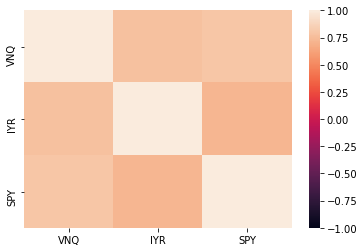

In [453]:
sns.heatmap(combined_first_dip_correlation, vmin=-1, vmax=1)

In [454]:
combined_first_dip_std = pd.DataFrame(columns=['SPY','IYR','VNQ'])
combined_first_dip_std['SPY']=[spy_std_first_dip]
combined_first_dip_std['IYR']=[iyr_std_first_dip]
combined_first_dip_std['VNQ']=[vnq_std_first_dip]

combined_first_dip_std.head()
        

,SPY,IYR,VNQ
0,0.018195,0.026715,0.03507


In [455]:
combined_first_dip_std.hvplot.bar(
    title="First Dip - Standard Deviation of Sector Grouping - 10/01/2007 to 03/02/2009",
    xlabel="Market Sectors",
    ylabel="Standard Deviation - First Dip"
)

:Bars   [index,Variable]   (value)

In [456]:
# Plot a rolling 30-day mean of IYR and SP500 closing prices

# Create a new pivot table where the columns are the closing prices for each ticker
c1_iyr_spy_rm30 = pd.concat([c1_iyr_jp, c1_spy_jp], axis="columns", join="inner")

# Sort datetime index in ascending order (past to present)
c1_iyr_spy_rm30.sort_index(inplace=True)

# Set column names
c1_iyr_spy_rm30.columns = ['IYR', 'SPY']

# Display a few rows
c1_iyr_spy_rm30.head()

,IYR,SPY
Date,,
2007-05-11,200.32,150.86
2007-05-14,198.56,150.53
2007-05-15,195.12,150.57
2007-05-16,195.08,151.60
2007-05-17,193.52,151.30


In [457]:
c1_iyr_spy_rm30_plot = c1_iyr_spy_rm30.rolling(window=30).mean().hvplot(
    title='First Dip - iShares Real Estate (IYR) & S&P500 (SPY) - 30-Day Rolling Mean of Closing Prices',
    x='Date', 
    y=['IYR', 'SPY'], 
    value_label='Closing Price',
    height=400,
    width=1200)


In [458]:
# Plot a rolling 30-day mean of IYR and SP500 closing prices

# Create a new pivot table where the columns are the closing prices for each ticker
c1_iyr_spy_rm30 = pd.concat([c1_iyr_jp, c1_spy_jp], axis="columns", join="inner")

# Sort datetime index in ascending order (past to present)
c1_iyr_spy_rm30.sort_index(inplace=True)

# Set column names
c1_iyr_spy_rm30.columns = ['IYR', 'SPY']

# Display a few rows
c1_iyr_spy_rm30.head()

,IYR,SPY
Date,,
2007-05-11,200.32,150.86
2007-05-14,198.56,150.53
2007-05-15,195.12,150.57
2007-05-16,195.08,151.60
2007-05-17,193.52,151.30


In [459]:
c1_iyr_spy_rm30_plot = c1_iyr_spy_rm30.rolling(window=30).mean().hvplot(
    title='First Dip - iShares US Real Estate (IYR) & S&P500 (SPY) - 30-Day Rolling Mean of Closing Prices',
    x='Date', 
    y=['IYR', 'SPY'], 
    value_label='Closing Price',
    height=400,
    width=1200)

c1_iyr_spy_rm30_plot

:NdOverlay   [Variable]
   :Curve   [Date]   (Closing Price)

In [523]:
# Plot a rolling 30-day mean of VIS and SP500 closing prices

# Create a new pivot table where the columns are the closing prices for each ticker
c1_vnq_spy_rm30 = pd.concat([c1_vnq_jp, c1_spy_jp], axis="columns", join="inner")

# Sort datetime index in ascending order (past to present)
c1_vnq_spy_rm30.sort_index(inplace=True)

# Set column names
c1_vnq_spy_rm30.columns = ['VNQ', 'SPY']

# Display a few rows
c1_vnq_spy_rm30.head()

,VNQ,SPY
Date,,
2006-01-03,60.76,126.70
2006-01-04,61.21,127.30
2006-01-05,61.68,127.38
2006-01-06,62.26,128.44
2006-01-09,62.79,128.77


In [460]:
c1_vnq_spy_rm30_plot = c1_vnq_spy_rm30.rolling(window=30).mean().hvplot(
    title='First Dip - Vanguard (VNQ) & S&P500 (SPY) - 30-Day Rolling Mean of Closing Prices',
    x='Date', 
    y=['VNQ', 'SPY'], 
    value_label='Closing Price',
    height=400,
    width=1200)

In [461]:
#c1_vnq_spy_rm30_plot

In [462]:
# Plot a rolling 30-day mean of 3 ETFs and SP500 closing prices

# Create a new pivot table where the columns are the closing prices for each ticker
c1_vnq_iyr_spy_rm30 = pd.concat([c1_iyr_jp, c1_vnq_jp, c1_spy_jp], axis="columns", join="inner")

# Sort datetime index in ascending order (past to present)
c1_vnq_iyr_spy_rm30.sort_index(inplace=True)

# Set column names
c1_vnq_iyr_spy_rm30.columns = ['IYR', 'VNQ', 'SPY']

# Display a few rows
c1_vnq_iyr_spy_rm30.head()

,IYR,VNQ,SPY
Date,,,
2007-05-11,200.32,79.25,150.86
2007-05-14,198.56,78.80,150.53
2007-05-15,195.12,77.60,150.57
2007-05-16,195.08,76.64,151.60
2007-05-17,193.52,75.31,151.30


In [463]:
c1_vnq_iyr_spy_rm30_plot = c1_vnq_iyr_spy_rm30.rolling(window=30).mean().hvplot(
    title='First Dip - iShares (IYR), Vanguard (VNQ), S&P500 (SPY) - 30-Day Rolling Mean of Closing Prices',
    x='Date', 
    y=['IYR', 'VNQ', 'SPY'], 
    value_label='Closing Price',
    height=400,
    width=1200)

#c1_vnq_iyr_spy_rm30_plot

In [464]:
c1_vnq_iyr_spy_rm30_returns = c1_vnq_iyr_spy_rm30.pct_change().dropna()

c1_vnq_iyr_spy_rm30_returns.head()

c1_vnq_iyr_spy_rm30_returns_plot = c1_vnq_iyr_spy_rm30_returns.rolling(window=30).mean().hvplot(
    title='First Dip - iShares (IYR), Vanguard (VNQ), S&P500 (SPY) - 30-Day Rolling Mean of Closing Prices',
    x='Date', 
     y=['IYR', 'VNQ', 'SPY'], 
    value_label='Closing Price',
    height=400,
    width=1200)

c1_vnq_iyr_spy_rm30_returns_plot

:NdOverlay   [Variable]
   :Curve   [Date]   (Closing Price)

In [465]:
# Plot cumulative returns for second dip period. 

c1_vnq_iyr_spy_rm30_cumulative_returns = (1 + c1_vnq_iyr_spy_rm30_returns).cumprod() - 1
c1_vnq_iyr_spy_rm30_cumulative_returns

c1_vnq_iyr_spy_rm30_cumulative_returns.tail()

,IYR,VNQ,SPY
Date,,,
2010-12-22,-0.683307,-0.303849,-0.166247
2010-12-23,-0.688698,-0.307003,-0.167440
2010-12-27,-0.688099,-0.305994,-0.167109
2010-12-28,-0.689896,-0.303218,-0.165915
2010-12-29,-0.687700,-0.301830,-0.165319


In [466]:
c1_vnq_iyr_spy_rm30_returns_cumulative_returns_plot = c1_vnq_iyr_spy_rm30_cumulative_returns[1244:].hvplot.bar(
    title='First Dip - iShares (IYR), Vanguard (VNQ), S&P500 (SPY) - 30-Day Rolling Mean of Closing Prices',
    xlabel='Market Secotrs',
    ylabel='Cumulative Return',
    height=400,
    width=1200
)
c1_vnq_iyr_spy_rm30_returns_cumulative_returns_plot

:Bars   [Date,Variable]   (value)

In [467]:
# Use the `std` function and multiply by the square root of the number of trading days in a year to get annualized volatility 
combined_first_dip_volatility = combined_first_dip_daily_returns.std() * np.sqrt(252)
combined_first_dip_volatility.sort_values(inplace=True)
combined_first_dip_volatility

SPY    0.288829
IYR    0.424095
VNQ    0.556726
dtype: float64

In [468]:
combined_second_dip_df = pd.concat([c2_vnq_jp, c2_iyr_jp, c2_spy_jp], axis="columns", join="inner")
combined_second_dip_df.sort_index(inplace=True)

# Set column names
combined_second_dip_df.columns = ['VNQ', 'IYR', 'SPY']

# Display a few rows
combined_second_dip_df.head()

# Use the `pct_change` function to calculate daily returns
combined_second_dip_daily_returns = combined_second_dip_df.pct_change().dropna()
combined_second_dip_daily_returns.head()

,VNQ,IYR,SPY
Date,,,
2014-01-03,-0.002894,-0.002812,-0.000164
2014-01-06,0.003507,-0.001633,-0.002898
2014-01-07,0.007109,0.005352,0.006142
2014-01-08,-0.001196,-0.003697,0.000218
2014-01-09,-0.015093,-0.004898,0.000654


In [469]:
combined_second_dip_daily_returns.describe()

,VNQ,IYR,SPY
count,1005.000000,1005.000000,1005.000000
mean,0.000143,-0.000069,0.000409
std,0.009096,0.008556,0.007634
min,-0.039515,-0.096048,-0.040884
25%,-0.005140,-0.004414,-0.002783
50%,0.000369,0.000000,0.000492
75%,0.005694,0.004548,0.004424
max,0.035324,0.027442,0.038394


In [470]:
# Create a new pivot table where the columns are the closing prices for each ticker
c2_vnq_spy_rm30 = pd.concat([c2_vnq_jp, c2_spy_jp], axis="columns", join="inner")

# Sort datetime index in ascending order (past to present)
c2_vnq_spy_rm30.sort_index(inplace=True)

# Set column names
c2_vnq_spy_rm30.columns = ['VNQ', 'SPY']

# Display a few rows
c2_vnq_spy_rm30.head()

,VNQ,SPY
Date,,
2014-01-02,82.94,182.92
2014-01-03,82.70,182.89
2014-01-06,82.99,182.36
2014-01-07,83.58,183.48
2014-01-08,83.48,183.52


In [471]:
c2_vnq_spy_rm30_plot = c2_vnq_spy_rm30.rolling(window=30).mean().hvplot(
    title='Second Dip - Vanguard (VNQ) & S&P500 (SPY) - 30-Day Rolling Mean of Closing Prices',
    x='Date', 
    y=['VNQ', 'SPY'], 
    value_label='Closing Price',
    height=400,
    width=1200)
#c2_vnq_spy_rm30_plot

In [472]:
# Plot a rolling 30-day mean of VIS and SP500 closing prices

# Create a new pivot table where the columns are the closing prices for each ticker
c2_iyr_spy_rm30 = pd.concat([c2_iyr_jp, c2_iyr_jp], axis="columns", join="inner")

# Sort datetime index in ascending order (past to present)
c2_iyr_spy_rm30.sort_index(inplace=True)

# Set column names
c2_iyr_spy_rm30.columns = ['IYR', 'SPY']

# Display a few rows
c2_iyr_spy_rm30.head()


,IYR,SPY
Date,,
2014-01-02,67.56,67.56
2014-01-03,67.37,67.37
2014-01-06,67.26,67.26
2014-01-07,67.62,67.62
2014-01-08,67.37,67.37


In [473]:
c2_iyr_spy_rm30_plot = c2_iyr_spy_rm30.rolling(window=30).mean().hvplot(
    title='Second Dip - Vanguard (VNQ), iShares (IYR), S&P500 (SPY) - 30-Day Rolling Mean of Closing Prices',
    x='Date', 
    y=['IYR', 'SPY'], 
    value_label='Closing Price',
    height=400,
    width=1200)
#c2_iyr_spy_rm30_plot 

In [474]:
# Create a new pivot table where the columns are the closing prices for each ticker
c2_vnq_iyr_spy_rm30 = pd.concat([c2_vnq_jp, c2_iyr_jp, c2_spy_jp], axis="columns", join="inner")

# Sort datetime index in ascending order (past to present)
c2_vnq_iyr_spy_rm30.sort_index(inplace=True)

# Set column names
c2_vnq_iyr_spy_rm30.columns = ['VNQ', 'IYR', 'SPY']

# Display a few rows
c2_vnq_iyr_spy_rm30.head()

c2_vnq_iyr_spy_rm30_plot = c2_vnq_iyr_spy_rm30.rolling(window=30).mean().hvplot(
    title='Second Dip - Vanguard (VNQ), iShares (IYR), S&P500 (SPY) - 30-Day Rolling Mean of Closing Prices',
    x='Date', 
    y=['VNQ', 'IYR', 'SPY'], 
    value_label='Closing Price',
    height=400,
    width=1200)
#c2_vnq_iyr_spy_rm30_plot

In [475]:
c2_vnq_spy_rm30_plot

:NdOverlay   [Variable]
   :Curve   [Date]   (Closing Price)

In [476]:
c2_iyr_spy_rm30_plot 

:NdOverlay   [Variable]
   :Curve   [Date]   (Closing Price)

In [477]:
c2_vnq_iyr_spy_rm30_plot

:NdOverlay   [Variable]
   :Curve   [Date]   (Closing Price)

In [478]:
# Plot a rolling 30-day mean of VNQ & SP500 daily returns.

c2_vnq_iyr_spy_rm30_returns = c2_vnq_iyr_spy_rm30.pct_change().dropna()

c2_vnq_iyr_spy_rm30.head()

,VNQ,IYR,SPY
Date,,,
2014-01-02,82.94,67.56,182.92
2014-01-03,82.70,67.37,182.89
2014-01-06,82.99,67.26,182.36
2014-01-07,83.58,67.62,183.48
2014-01-08,83.48,67.37,183.52


In [479]:
c2_vnq_iyr_spy_rm30_returns_plot = c2_vnq_iyr_spy_rm30_returns.rolling(window=30).mean().hvplot(
    title='Second Dip - Vanguard Materials (VNQ), iShares (IYR), S&P500 (SPY) - 30-Day Rolling Mean of Daily Returns',
    x='Date', 
    y=['VNQ', 'IYR', 'SPY'], 
    value_label='Closing Price',
    height=400,
    width=1200)

c2_vnq_iyr_spy_rm30_returns_plot

:NdOverlay   [Variable]
   :Curve   [Date]   (Closing Price)

In [480]:
# Plot cumulative returns for second dip period. 

c2_vnq_iyr_spy_rm30_cumulative_returns = (1 + c2_vnq_iyr_spy_rm30_returns).cumprod() - 1
c2_vnq_iyr_spy_rm30_cumulative_returns

c2_vnq_iyr_spy_rm30_cumulative_returns.tail()


,VNQ,IYR,SPY
Date,,,
2017-12-21,0.101519,-0.103464,0.462825
2017-12-22,0.101640,-0.104500,0.462443
2017-12-26,0.105860,-0.102872,0.460693
2017-12-27,0.102845,-0.103168,0.461404
2017-12-28,0.108030,-0.101095,0.464411


In [481]:
c2_vnq_iyr_spy_rm30_cumulative_returns_plot = c2_vnq_iyr_spy_rm30_cumulative_returns[1004:].hvplot.bar(
    title='Second Dip - Vanguard (VNQ), iShares (IYR), S&P500 (SPY) - Cumulative Returns',
    xlabel='Market Secotrs',
    ylabel='Cumulative Return',
    height=400,
    width=1200
)

In [482]:
c2_vnq_iyr_spy_rm30_cumulative_returns_plot

:Bars   [Date,Variable]   (value)

In [485]:
# Plot a rolling 30-day mean of IYR and SP500 closing prices

# Create a new pivot table where the columns are the closing prices for each ticker
c3_iyr_spy_rm30 = pd.concat([c3_iyr_jp, c3_spy_jp], axis="columns", join="inner")

# Sort datetime index in ascending order (past to present)
c3_iyr_spy_rm30.sort_index(inplace=True)

# Set column names
c3_iyr_spy_rm30.columns = ['VNQ', 'SPY']

# Display a few rows
c3_iyr_spy_rm30.head()

,VNQ,SPY
Date,,
2017-01-03,59.35,225.24
2017-01-04,59.84,226.58
2017-01-05,60.56,226.40
2017-01-06,60.07,227.21
2017-01-09,59.65,226.46


In [486]:
c3_iyr_spy_rm30_plot = c3_iyr_spy_rm30.rolling(window=30).mean().hvplot(
    title='Third Dip - Vanguard (VNQ) & S&P500 (SPY) - 30-Day Rolling Mean of Closing Prices',
    x='Date', 
    y=['VNQ', 'SPY'], 
    value_label='Closing Price',
    height=400,
    width=1200)

In [491]:
c3_vnq_iyr_spy_rm30_returns = pd.concat([c3_vnq_jp, c3_iyr_jp, c3_spy_jp], axis="columns", join="inner")
c3_vnq_iyr_spy_rm30_returns.sort_index(inplace=True)

# Set column names
c3_vnq_iyr_spy_rm30_returns.columns = ['VNQ', 'IYR', 'SPY']

# Display a few rows
c3_vnq_iyr_spy_rm30_returns.head()

,VNQ,IYR,SPY
Date,,,
2017-01-03,103.42,59.35,225.24
2017-01-04,104.13,59.84,226.58
2017-01-05,103.37,60.56,226.40
2017-01-06,101.94,60.07,227.21
2017-01-09,100.95,59.65,226.46


In [522]:
c3_vnq_iyr_spy_rm30_returns_plot = c3_vnq_iyr_spy_rm30_returns.rolling(window=30).mean().hvplot(
    title='Third Dip - Vanguard Materials (VAW), Discretionary (VCR), Industrials (VIS) Index Funds & S&P500 (SPY) - 30-Day Rolling Mean of Daily Returns',
    x='Date', 
    y=['VNQ', 'IYR', 'SPY'], 
    value_label='Closing Price',
    height=400,
    width=1200)
c3_vnq_iyr_spy_rm30_returns_plot

:NdOverlay   [Variable]
   :Curve   [Date]   (Closing Price)

In [520]:
c3_vnq_iyr_spy_rm30_cumulative_returns = (1 + c3_vnq_iyr_spy_rm30_returns).cumprod() - 1
c3_vnq_iyr_spy_rm30_cumulative_returns

c3_vnq_iyr_spy_rm30_cumulative_returns.head()


,VNQ,IYR,SPY
Date,,,
2017-01-03,1.034200e+02,5.935000e+01,2.252400e+02
2017-01-04,1.097667e+04,3.670694e+03,5.148670e+04
2017-01-05,1.145739e+06,2.260285e+05,1.170830e+07
2017-01-06,1.179425e+08,1.380362e+07,2.671952e+09
2017-01-09,1.202423e+10,8.371896e+08,6.077622e+11


In [502]:
c1_cumulative_returns = c1_vnq_iyr_spy_rm30_cumulative_returns[1244:]
c1_cumulative_returns
list_of_crashes_1 = ['Crash 1']
c1_cumulative_returns.loc[:,'Market_Crash']=list_of_crashes_1

c2_cumulative_returns = c2_vnq_iyr_spy_rm30_cumulative_returns[1004:]
c2_cumulative_returns
list_of_crashes_2 = ['Crash 2']
c2_cumulative_returns.loc[:,'Market_Crash']=list_of_crashes_2

c3_cumulative_returns = c3_vnq_iyr_spy_rm30_cumulative_returns[750:]
c3_cumulative_returns
list_of_crashes_3 = ['Crash 3']
c3_cumulative_returns.loc[:,'Market_Crash']=list_of_crashes_3

c123_cumulative_returns = pd.concat([c1_cumulative_returns,c2_cumulative_returns,c3_cumulative_returns],
    axis="rows",
    join="inner"
)
c123_cumulative_returns.set_index(c123_cumulative_returns['Market_Crash'], inplace=True)

c123_cumulative_returns.set_index('Market_Crash').hvplot(
    title="Across Three Crashes - Vanguard (VNQ), iShares (IYR), S&P500 (SPY) - Cumulative Returns",
    kind='bar', 
    stacked=False,
    height=400,
    width=1200,
    hover_color='red'
)


ValueError: cannot set using a multi-index selection indexer with a different length than the value

In [504]:
# Full Date Range DF
# Create a new pivot table where the columns are the closing prices for each ticker
combined_full_date_range_df = pd.concat([f_vnq_jp, f_rem_jp, f_spy_jp], axis="columns", join="inner")

# Sort datetime index in ascending order (past to present)
combined_full_date_range_df.sort_index(inplace=True)

# Set column names
combined_full_date_range_df.columns = ['VNQ', 'IYR', 'SPY']

# Display a few rows
combined_full_date_range_df.head()

,VNQ,IYR,SPY
Date,,,
2010-01-04,44.55,59.08,113.33
2010-01-05,44.50,59.12,113.63
2010-01-06,44.42,59.16,113.71
2010-01-07,44.90,59.76,114.19
2010-01-08,44.57,60.08,114.57


In [505]:
# Use the `pct_change` function to calculate daily returns
combined_full_date_range_daily_returns = combined_full_date_range_df.pct_change().dropna()
combined_full_date_range_daily_returns.head()

,VNQ,IYR,SPY
Date,,,
2010-01-05,-0.001122,0.000677,0.002647
2010-01-06,-0.001798,0.000677,0.000704
2010-01-07,0.010806,0.010142,0.004221
2010-01-08,-0.007350,0.005355,0.003328
2010-01-11,0.005834,0.000666,0.001397


In [506]:
combined_full_date_range_daily_returns.describe()

,VNQ,IYR,SPY
count,2766.000000,2766.000000,2766.000000
mean,0.000318,-0.000103,0.000489
std,0.013383,0.015712,0.010901
min,-0.177277,-0.233138,-0.109424
25%,-0.005421,-0.004329,-0.003517
50%,0.000844,0.000844,0.000633
75%,0.006743,0.005232,0.005424
max,0.091039,0.208200,0.090603


<AxesSubplot:xlabel='Date'>

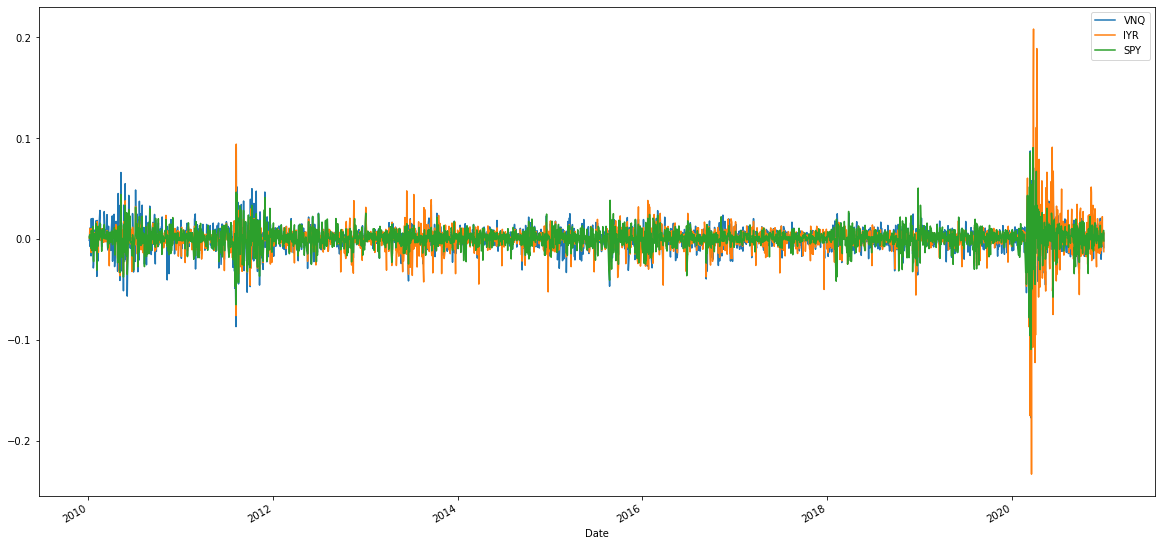

In [507]:
combined_full_date_range_daily_returns.plot(figsize=(20,10))

<AxesSubplot:xlabel='Date'>

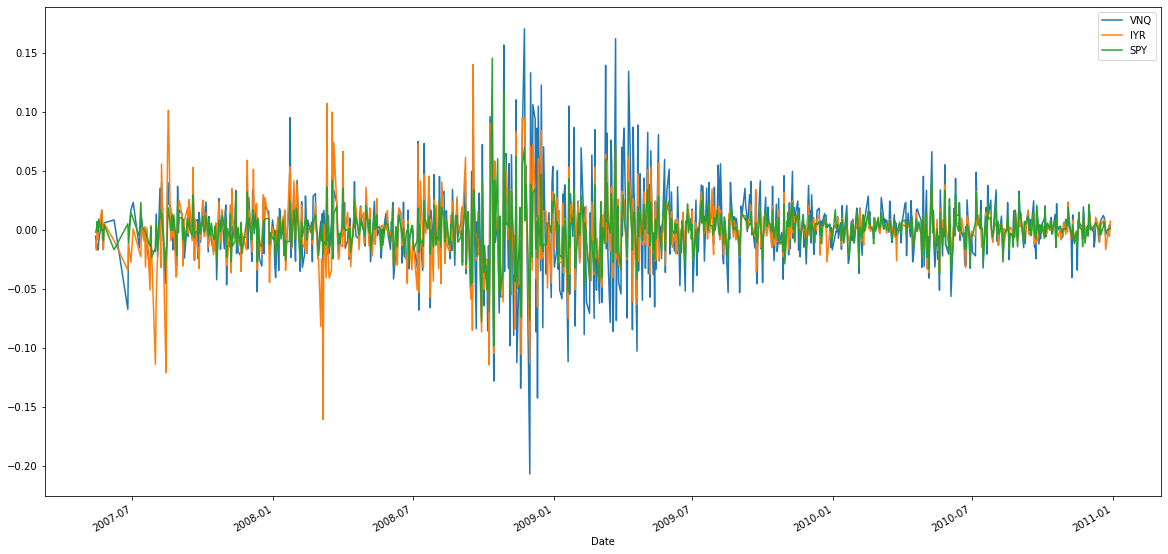

In [508]:
combined_first_dip_daily_returns.plot(figsize=(20,10))

<AxesSubplot:xlabel='Date'>

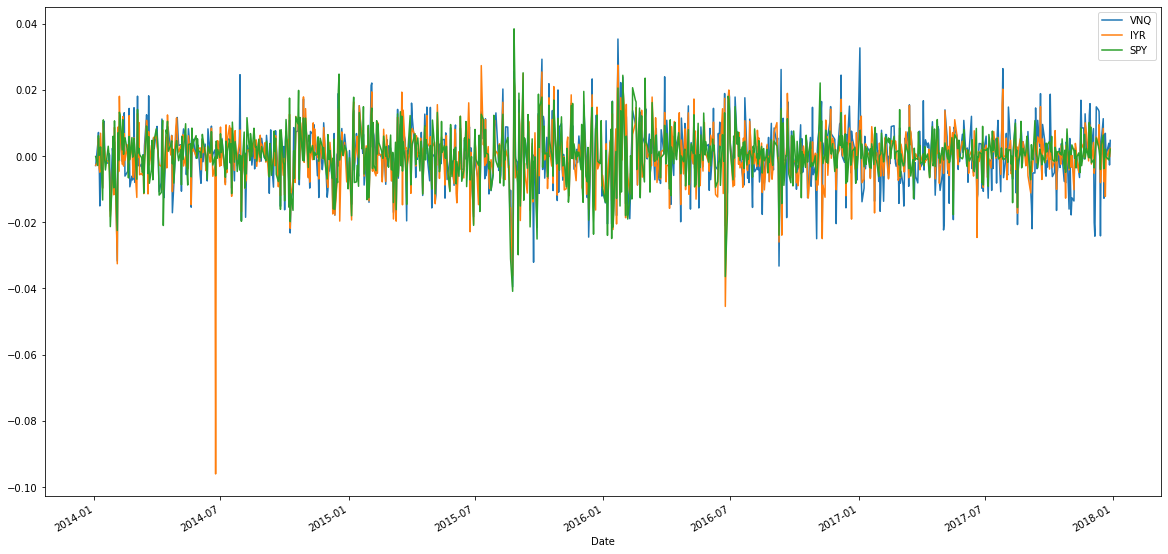

In [509]:
combined_second_dip_daily_returns.plot(figsize=(20,10))

<AxesSubplot:xlabel='Date'>

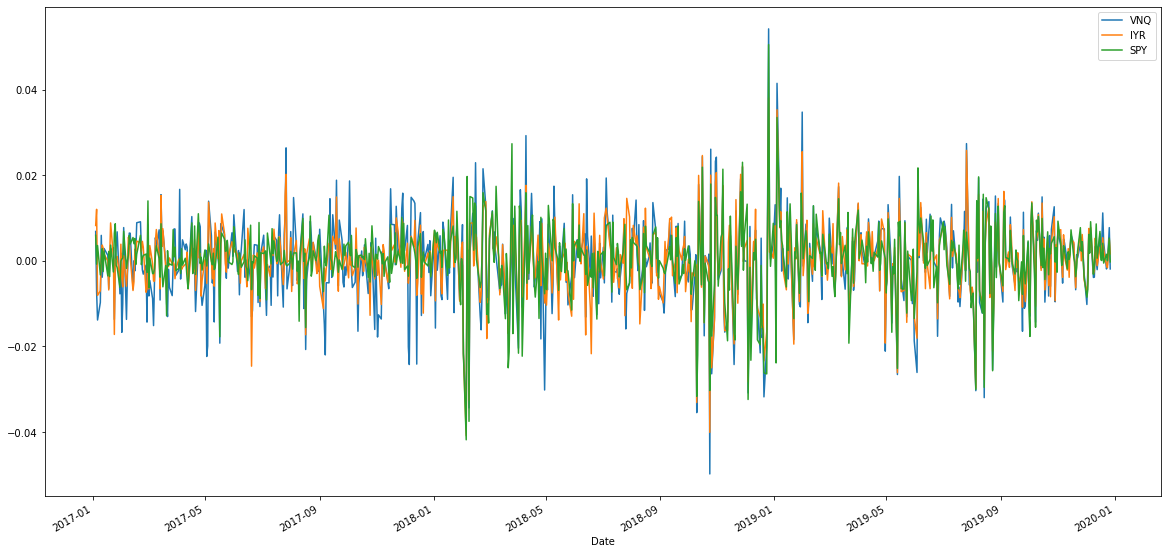

In [511]:
combined_third_dip_daily_returns.plot(figsize=(20,10))

In [512]:
combined_full_date_range_daily_returns.hvplot()

:NdOverlay   [Variable]
   :Curve   [Date]   (value)

In [514]:
#list(combined_full_date_range_daily_returns.columns)

spy_v_vnq_full_df = pd.concat([f_spy_jp, f_vnq_jp], axis="columns", join="inner")

# Sort datetime index in ascending order (past to present)
spy_v_vnq_full_df.sort_index(inplace=True)

# Set column names
spy_v_vnq_full_df.columns = ['SPY', 'VNQ']

# Display a few rows
spy_v_vnq_full_df.head()

,SPY,VNQ
Date,,
2010-01-04,113.33,44.55
2010-01-05,113.63,44.50
2010-01-06,113.71,44.42
2010-01-07,114.19,44.90
2010-01-08,114.57,44.57


In [516]:
# Use the `pct_change` function to calculate daily returns
spy_v_vnq_full_daily_returns = spy_v_vnq_full_df.pct_change().dropna()
spy_v_vnq_full_daily_returns.head()

,SPY,VNQ
Date,,
2010-01-05,0.002647,-0.001122
2010-01-06,0.000704,-0.001798
2010-01-07,0.004221,0.010806
2010-01-08,0.003328,-0.007350
2010-01-11,0.001397,0.005834


In [517]:
spy_v_vnq_full_daily_returns.hvplot()

:NdOverlay   [Variable]
   :Curve   [Date]   (value)

<AxesSubplot:xlabel='Date'>

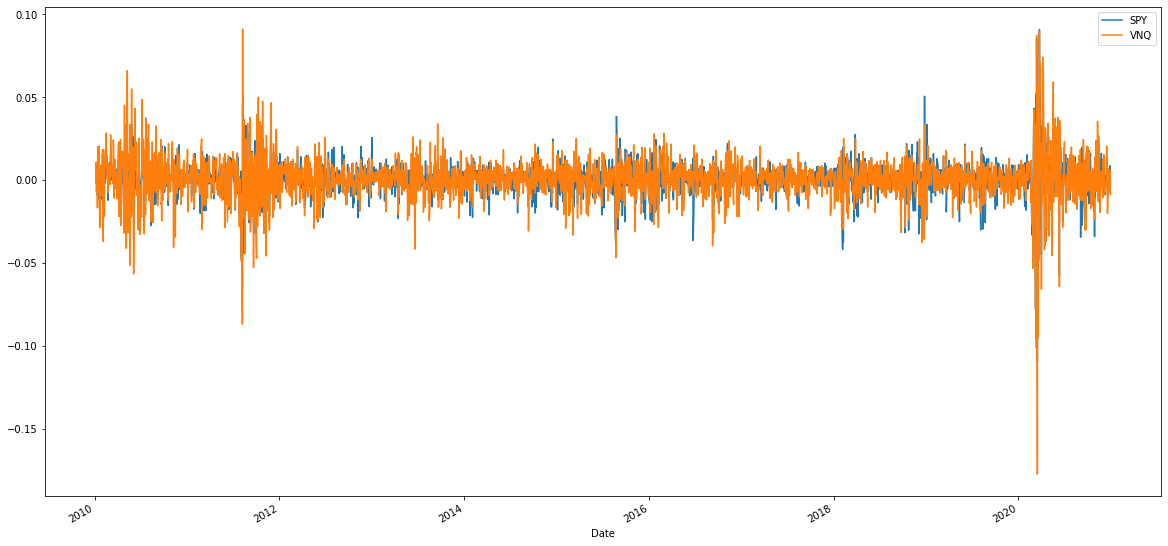

In [518]:
spy_v_vnq_full_daily_returns.plot(figsize=(20,10))

In [519]:
spy_v_vnq_full_chart = spy_v_vnq_full_daily_returns.hvplot.scatter(
    'Date',
    ['SPY', 'VNQ'],
    title='SPY v VNQ - Daily Returns - Full Range',
    xlabel='X',
    ylabel='Y',
    groupby='Date',
    height=500, 
    width=800, 
    rot=90,
)
spy_v_vnq_full_chart

:DynamicMap   [Date]
   :NdOverlay   [Variable]
      :Scatter   [Date]   (value)

In [ ]:
#list(combined_full_date_range_daily_returns.columns)

spy_v_vaw_first_dip_df = pd.concat([c1_spy_ss_csv, c1_vaw_ss_csv], axis="columns", join="inner")

# Sort datetime index in ascending order (past to present)
spy_v_vaw_first_dip_df.sort_index(inplace=True)

# Set column names
spy_v_vaw_first_dip_df.columns = ['SPY', 'VAW']

# Display a few rows
#spy_v_vaw_first_dip_df.head()

# Use the `pct_change` function to calculate daily returns
spy_v_vaw_first_dip_daily_returns = spy_v_vaw_first_dip_df.pct_change().dropna()
spy_v_vaw_first_dip_daily_returns.head()


In [ ]:
31]:
# Functions used to gather daily returns, volatility, and cumulative returns.

def returns(x):
    ## Calculate daily returns of closing prices for 
    ## ETFs, Stock Tickers, or Indices.
    daily_returns = x.pct_change().dropna()
    
    def sharpe(daily_returns):
        ## The ratio is the average return earned in 
        ## excess of the risk-free rate per unit of volatility or total risk. 
        return np.sqrt(252) * (daily_returns.mean() / daily_returns.std())
    
    def cumulative_returns(daily_returns):
        ## Calculate the cumulative returns of the 
        ## ETFs, Stock Tickers, or Indices.
        cumulative_returns = (1 + daily_returns(x)).cumprod().dropna()
        return cumulative_returns
    
    print(f'''
    The daily returns of the sectors are:
    {daily_returns}
    
    The cumulative returns of the sectors are:
    {cumulative_returns}
    
    The average returns in excess of risk-free
    rate per unit of volatility:
    {sharpe(daily_returns)}
    ''')
